# **Recurrent Neural Networks & Day Trading (LSTM)**


# **1. Recurrent Neural Network**



*   recurrent neural network store the output activations from one or more of the layers of the network, often called **hidden layers**
* The next time we feed an input to the network, we include the previously-stored outputs as additional inputs.  





*   RNNs are quite powerful but, they suffer from **Vanishing gradient**

*   It hinders them from long term information, hence limiting RNN with poor results. 

*  Instead, we use a better variation of **RNNs: Long Short Term Networks(LSTM).**




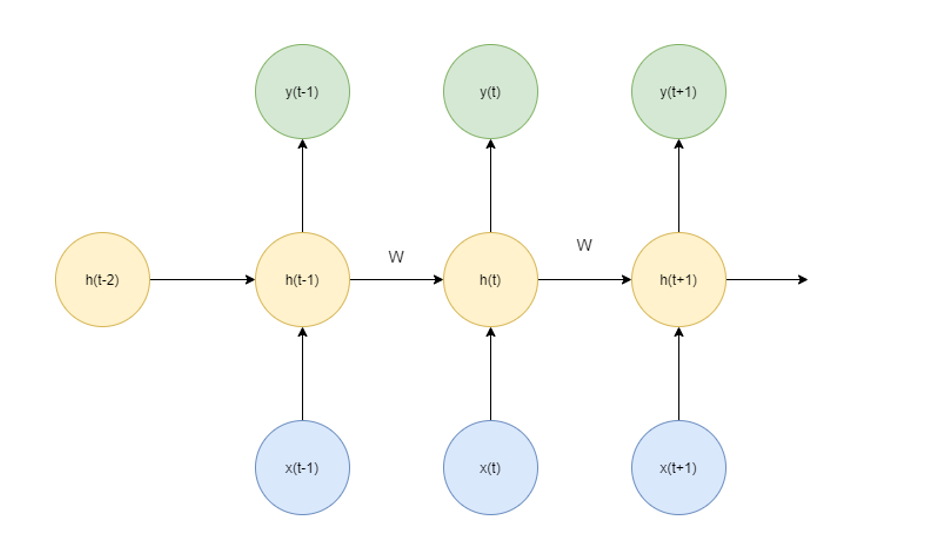

# **2. Long Short Term Networks(LSTM)**



*   This is a popular RNN architecture is a solution to vanishing gradient problem. They work to address the problem of long-term dependencies.
*   LSTMs have “cells” in the hidden layers of the neural network, which have three gates–an input gate, an output gate, and a forget gate. 


*   These gates control the flow of information which is needed to predict the output in the network.





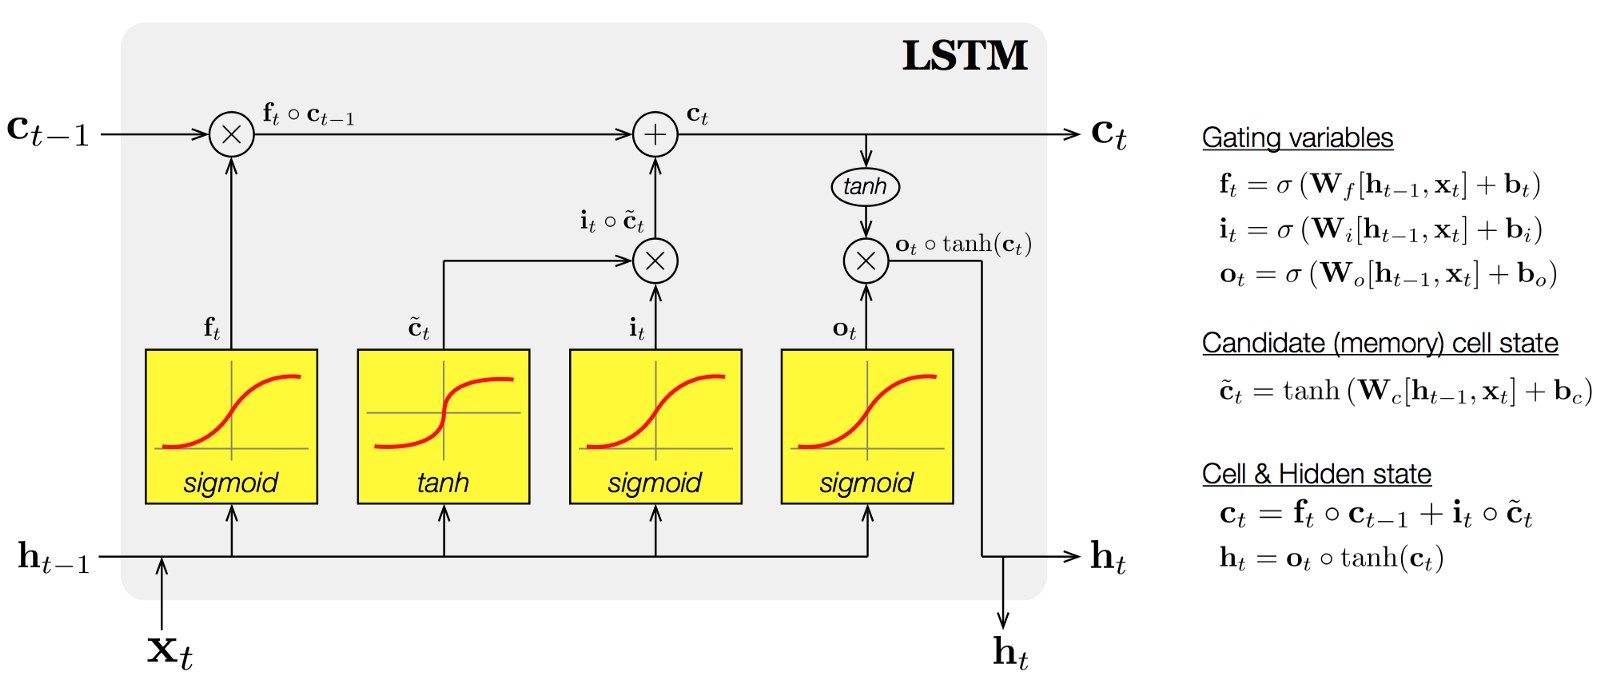

# 3. Code Execution

In [ ]:
|# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# First, we get the data
dataset = pd.read_csv('https://github.com/koshtinikhilesh/NeuralNetwork_Project/blob/main/IBM_2006-01-01_to_2018-01-01.csv?raw=true', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

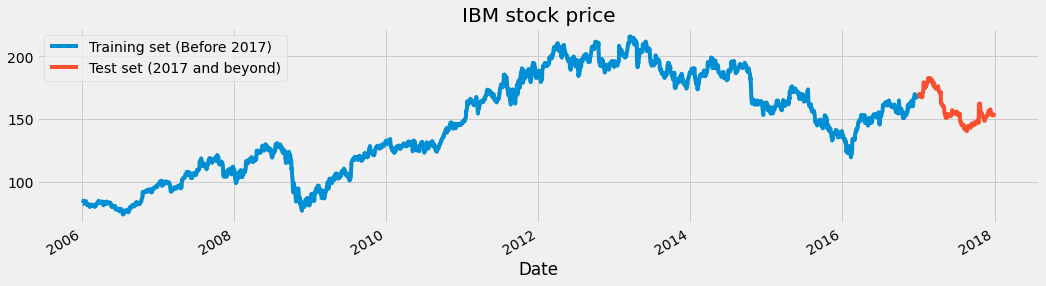

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)




*   We have taken 60 as our time step value.
*   n no of time_steps in LSTM = n no of previous training elements



In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))



*   We use reshape() funtion to change the shape of the array. Here we added 1 to convert 2D array to 3D array. 
*   2D array provide medium complexity but 3D array provide maximum complexity.






# 3. Stacked LSTM Model

The Stacked LSTM is nothing but an LSTM Model with multiple LSTM layers. The LSTM layer gives a sequential output to the next LSTM layer.

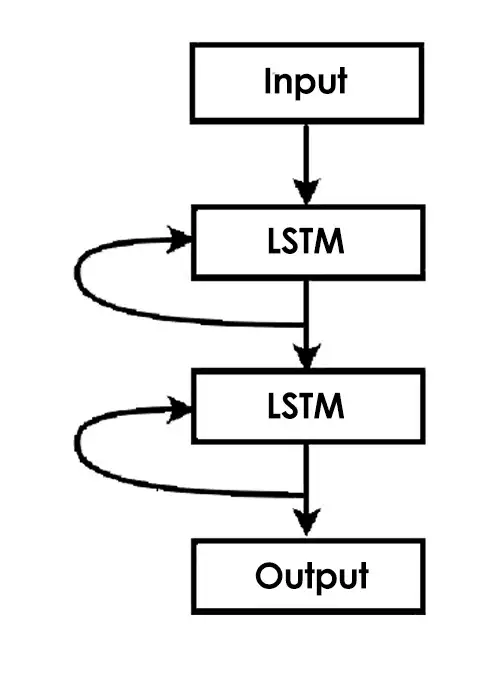

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 22s 134ms/step - loss: 0.0236
Epoch 2/50
85/85 [==============================] - 11s 129ms/step - loss: 0.0108
Epoch 3/50
85/85 [==============================] - 11s 130ms/step - loss: 0.0081
Epoch 4/50
85/85 [==============================] - 11s 131ms/step - loss: 0.0074
Epoch 5/50
85/85 [==============================] - 13s 154ms/step - loss: 0.0064
Epoch 6/50
85/85 [==============================] - 12s 143ms/step - loss: 0.0057
Epoch 7/50
85/85 [==============================] - 11s 132ms/step - loss: 0.0053
Epoch 8/50
85/85 [==============================] - 11s 131ms/step - loss: 0.0046
Epoch 9/50
85/85 [==============================] - 12s 144ms/step - loss: 0.0043
Epoch 10/50
85/85 [==============================] - 11s 131ms/step - loss: 0.0038
Epoch 11/50
85/85 [==============================] - 11s 134ms/step - loss: 0.0037
Epoch 12/50
85/85 [==============================] - 11s 132ms/step - loss: 0.0034
Epoch 13/50
8

Used 4 LSTM layers for the model and the optimizer is Rmsprop

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 34ms/step


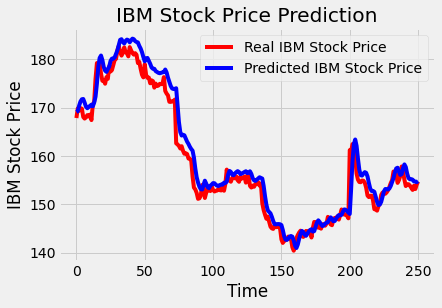

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)


The root mean squared error is 2.5942884190823072.


# 4. Conclusion

1. Implemented LSTM using Keras Library.
2. The data implemented in this model is time series data. Therefore, the data is divided with respwect to year value.
3. Model predicts the high value of the dataset.
4. Since LSTM is sensitive to scale, we have implemented MinMaxScaler in order to convert all high values in our dataset to range of 0 to 1.
5. Our Training Data is the entire array of data before year = 2016.
6. Our Testing Data contains all the values after year = 2017.
7. In our LSTM Model we are using 60 time_steps.
8. We use reshape() funtion to change the shape of the array. Here we added 1 to convert 2D array to 3D array.
9. 2D array provide medium complexity but 3D array provide maximum complexity.
10. Used 4 LSTM layers for the model and the optimizer is Rmsprop instead of Adam because of better RMSE value close to 0 -> 0.5
11. RMSPROP_RMSE value = 2.5   ADAM_RMSE value = 5.2
